In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objs as go


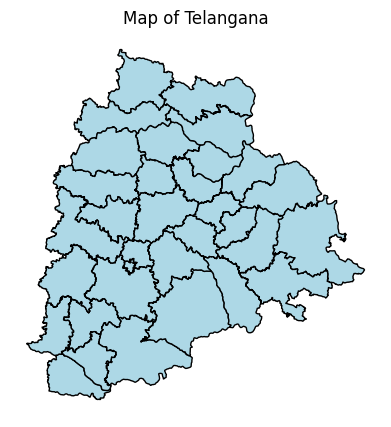

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Telangana shapefile data
telangana_map = gpd.read_file(r"C:\Users\koush\Downloads\Telangana_Shape_Files\20231018__Telangana_Shape_Files\TS_District_Boundary_33\TS_District_Boundary_33_FINAL.shp")

# Plot Telangana map
fig, ax = plt.subplots(figsize=(5, 5))
telangana_map.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title('Map of Telangana')
plt.axis('off')  # Turn off axis
plt.show()


In [4]:
dataset_df1 = pd.read_csv(r"./premonsoon/ground_water_quality_2018_pre.csv")
dataset_df2 = pd.read_csv(r"./premonsoon/ground_water_quality_2019_pre.csv")
dataset_df3 = pd.read_csv(r"./premonsoon/ground_water_quality_2020_pre.csv")
dataset_df4 = pd.read_csv(r"./premonsoon/ground_water_quality_2021_pre.csv")
dataset_df5 = pd.read_csv(r"./premonsoon/ground_water_quality_2022_pre.csv")
dataset_df6 = pd.read_csv(r"./postmonsoon/ground_water_quality_2018_post.csv")
dataset_df7 = pd.read_csv(r"./postmonsoon/ground_water_quality_2019_post.csv")
dataset_df8 = pd.read_csv(r"./postmonsoon/ground_water_quality_2020_post.csv")
dataset_df9 = pd.read_csv(r"./postmonsoon/ground_water_quality_2021_post.csv")
dataset_df = pd.concat([dataset_df1,dataset_df2,dataset_df3,dataset_df4,dataset_df5,dataset_df6,dataset_df7,dataset_df8,dataset_df9],join='outer',ignore_index=True)
#dataset_df.drop(columns=['RL_GIS','sno','village','mandal','district','gwl'],inplace=True)
dataset_df['season']=dataset_df['season'].astype(str).apply(lambda x: 0 if 'pre' in x.lower() else 1)

In [5]:
dataset_df['district'].unique()

array(['ADILABAD', 'BHADRADRI', 'BHUPALPALLY', 'HYDERABAD', 'JAGITYAL',
       'JANGAON', 'JOGULAMBA(GADWAL)', 'KAMAREDDY', 'KARIMNAGAR',
       'KHAMMAM', 'KUMURAM BHEEM', 'MAHABUBABAD', 'MAHABUBNAGAR',
       'MANCHERIAL', 'MEDAK', 'MEDCHAL', 'MULUGU', 'NAGARKURNOOL',
       'NALGONDA', 'NARAYANPET', 'NIRMAL', 'NIZAMABAD', 'PEDDAPALLY',
       'RANGAREDDY', 'SANGAREDDY', 'SIDDIPET', 'SIRCILLA', 'SURYAPET',
       'VIKARABAD', 'WANAPARTHY', 'WARANGAL (R) ', 'WARANGAL (U)',
       'YADADRI', nan], dtype=object)

In [6]:
dataset_df['pH'] = pd.to_numeric(dataset_df['pH'], errors='coerce')

# Now convert to float
dataset_df['pH'] = dataset_df['pH'].astype(float)
dataset_df['RSC  meq  / L'] = pd.to_numeric(dataset_df['RSC  meq  / L'], errors='coerce')

# Now convert to float
dataset_df['RSC  meq  / L'] = dataset_df['RSC  meq  / L'].astype(float)


In [7]:
#To remove rows containing null values
for index, row in dataset_df.iterrows():
    if 'NA' in row.values:
        dataset_df.drop(index, inplace=True)
    elif(row['Classification']=='OG')or(row['Classification']=='O.G')or(row['Classification']=='BELOW THE GRAPH')or(row['Classification']=='OUT OF SAR GRAPH')or(row['Classification']=='BG'):
        dataset_df.drop(index, inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [8]:
null_threshold = len(dataset_df) * 0.25
for column in dataset_df.columns:
    null_count = dataset_df[column].isnull().sum()
    if null_count > null_threshold:
        dataset_df.drop(column, axis=1, inplace=True)
    elif null_count > 0:
        dataset_df.dropna(subset=[column], inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [9]:
dataset_df.describe()

,sno,long_gis,lat_gis,season,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.00000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,282.495007,66.772025,29.599037,0.387202,7.843799,1233.101610,789.881749,5.41146,268.275171,174.904218,1.037786,60.958889,49.644993,117.753836,8.560754,68.429224,47.475201,366.806037,2.790353,-1.865046
std,278.261591,24.484076,24.306903,0.487160,0.458430,738.381329,473.032944,16.97257,128.542345,171.081966,0.812726,79.534434,63.171954,103.979699,21.907266,52.806161,34.073709,216.250298,2.589769,4.136058
min,1.000000,0.000000,0.000000,0.000000,6.160000,102.000000,65.280000,0.00000,10.000000,10.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.100000,19.995888,0.140000,-59.584539
25%,46.000000,77.770000,17.270000,0.000000,7.530000,750.000000,481.000000,0.00000,180.000000,60.000000,0.520000,13.488318,16.000000,53.000000,2.000000,32.000000,24.310000,220.000000,1.360000,-3.200000
50%,206.000000,78.474600,17.970000,0.000000,7.880000,1047.000000,670.720000,0.00000,250.000000,120.000000,0.840000,36.000000,29.000000,88.000000,3.220000,56.000000,39.000000,320.000000,2.090000,-1.200000
75%,376.000000,79.290000,19.024500,1.000000,8.180000,1520.000000,974.000000,0.00000,340.000000,220.000000,1.290000,74.559325,55.000000,145.450000,6.870000,88.000000,63.000000,459.893092,3.225302,0.001000
max,1024.000000,81.180000,81.180000,1.000000,10.590000,9499.000000,6079.360000,200.00000,1240.000000,2480.000000,13.700000,1028.000000,860.000000,1154.000000,356.000000,640.000000,457.028000,3479.226974,31.435063,18.200822


In [10]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907 entries, 0 to 4906
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               4907 non-null   int64  
 1   district          4907 non-null   object 
 2   mandal            4907 non-null   object 
 3   village           4907 non-null   object 
 4   long_gis          4907 non-null   float64
 5   lat_gis           4907 non-null   float64
 6   season            4907 non-null   int64  
 7   pH                4907 non-null   float64
 8   E.C               4907 non-null   float64
 9   TDS               4907 non-null   float64
 10  CO3               4907 non-null   float64
 11  HCO3              4907 non-null   float64
 12  Cl                4907 non-null   float64
 13  F                 4907 non-null   float64
 14  NO3               4907 non-null   float64
 15  SO4               4907 non-null   float64
 16  Na                4907 non-null   float64


In [11]:
dataset_ewqi = dataset_df.drop(['lat_gis','long_gis','sno','district','mandal','village','season','Classification','Classification.1'], axis=1,inplace=False)
max_values = dataset_ewqi.max()
min_values = dataset_ewqi.min()
normalized_dataset = (dataset_ewqi - min_values) / (max_values - min_values)
normalized_dataset.head()

,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
0,0.462754,0.138874,0.138874,0.00,0.186992,0.072874,0.024818,0.091768,0.150000,0.080729,0.014045,0.073552,0.244516,0.161832,0.050339,0.678641
1,0.480813,0.161541,0.161541,0.00,0.284553,0.056680,0.024818,0.168457,0.133721,0.089410,0.053371,0.161189,0.191312,0.173407,0.054119,0.699200
2,0.492099,0.091199,0.091199,0.25,0.203252,0.024291,0.045255,0.040111,0.065116,0.046007,0.005618,0.086072,0.159391,0.121380,0.031959,0.732619
3,0.465011,0.043312,0.043312,0.00,0.178862,0.008097,0.066423,0.018741,0.034884,0.052951,0.005618,0.061033,0.042344,0.046245,0.060770,0.778877
4,0.480813,0.047675,0.047675,0.00,0.170732,0.004049,0.089781,0.031537,0.029070,0.040799,0.019663,0.048513,0.052984,0.046242,0.046273,0.776308


In [13]:
weights = {
    'pH': 0.2,
    'E.C': 0.15,
    'TDS': 0.15,
    'Cl': 0.15,
    'F': 0.1,
    'NO3': 0.1,
    'SO4': 0.1,
    'Na': 0.05,
    'K': 0.05,
    'Ca': 0.05,
    'Mg': 0.05,
    'T.H': 0.05,
    'SAR': 0.05,
    'RSC meq / L': 0.05
}
weighted_quality = normalized_dataset * pd.Series(weights)
dataset_ewqi['EWQI'] = (weighted_quality.sum(axis=1)) * 100

In [14]:
dataset_df['EWQI'] = dataset_ewqi['EWQI']
dataset_df.head()

,sno,district,mandal,village,long_gis,lat_gis,season,pH,E.C,TDS,...,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1,EWQI
0,1,ADILABAD,Adilabad,Adilabad,78.524700,19.668300,0,8.21,1407.0,900.48,...,95.0,5.0,48.0,111.826,579.810855,1.715349,C3S1,-6.796217,P.S.,19.387659
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,78.350833,19.458888,0,8.29,1620.0,1036.80,...,105.0,19.0,104.0,87.516,619.851974,1.833654,C3S1,-5.197039,P.S.,20.512110
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,78.512222,19.525555,0,8.34,959.0,613.76,...,55.0,2.0,56.0,72.930,439.876645,1.140169,C3S1,-2.597533,P.S.,16.298189
3,4,ADILABAD,Jainath,Jainath,78.640000,19.730555,0,8.22,509.0,325.76,...,63.0,2.0,40.0,19.448,179.967105,2.041814,C2S1,1.000658,P.S.,13.078910
4,5,ADILABAD,Narnoor,Narnoor,78.852654,19.495665,0,8.29,550.0,352.00,...,49.0,7.0,32.0,24.310,179.958882,1.588114,C2S1,0.800822,P.S.,13.568105


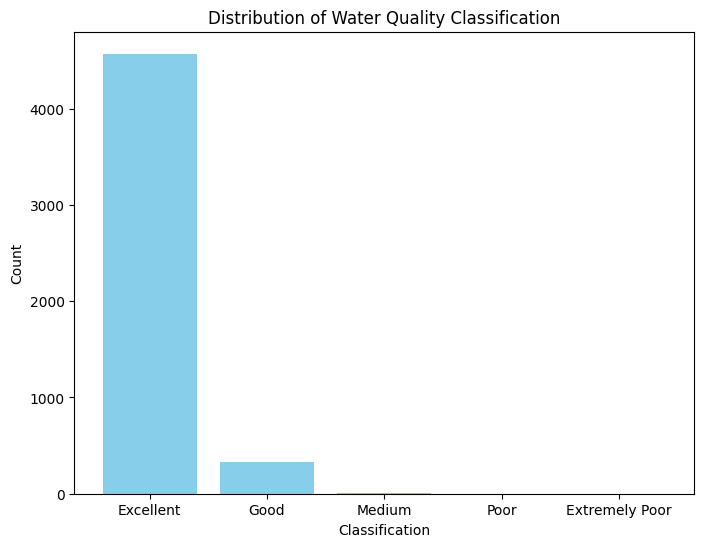

In [15]:
categories = [(0,25),(25, 50),(50, 100), (100, 150), (150, float('inf'))]
category_labels = ['Excellent','Good', 'Medium', 'Poor', 'Extremely Poor']

category_counts = []

for category in categories:
    count = dataset_ewqi[(dataset_df['EWQI'] >= category[0]) & (dataset_df['EWQI'] < category[1])]['EWQI'].count()
    category_counts.append(count)

plt.figure(figsize=(8, 6))
plt.bar(category_labels, category_counts, color='skyblue')
plt.title('Distribution of Water Quality Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

In [16]:
categories = [(0, 25), (25, 50), (50, 100), (100, 150), (150, np.inf)]
category_labels = ['Excellent', 'Good', 'Medium', 'Poor', 'Very Poor']
colors=['green','lightgreen','yellow','orange','red']
# Function to map EWQI values to labels
def map_EWQI_to_label(EWQI):
    for i, (start, end) in enumerate(categories):
        if start <= EWQI and EWQI<end:
            return colors[i]
    return 'Unknown'
# Replace values in 'EWQI' column with corresponding labels
dataset_df['EWQI'] = dataset_df['EWQI'].apply(map_EWQI_to_label)
dataset_df.head()


,sno,district,mandal,village,long_gis,lat_gis,season,pH,E.C,TDS,...,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1,EWQI
0,1,ADILABAD,Adilabad,Adilabad,78.524700,19.668300,0,8.21,1407.0,900.48,...,95.0,5.0,48.0,111.826,579.810855,1.715349,C3S1,-6.796217,P.S.,green
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,78.350833,19.458888,0,8.29,1620.0,1036.80,...,105.0,19.0,104.0,87.516,619.851974,1.833654,C3S1,-5.197039,P.S.,green
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,78.512222,19.525555,0,8.34,959.0,613.76,...,55.0,2.0,56.0,72.930,439.876645,1.140169,C3S1,-2.597533,P.S.,green
3,4,ADILABAD,Jainath,Jainath,78.640000,19.730555,0,8.22,509.0,325.76,...,63.0,2.0,40.0,19.448,179.967105,2.041814,C2S1,1.000658,P.S.,green
4,5,ADILABAD,Narnoor,Narnoor,78.852654,19.495665,0,8.29,550.0,352.00,...,49.0,7.0,32.0,24.310,179.958882,1.588114,C2S1,0.800822,P.S.,green


In [20]:

color_map = {'green': 'green', 'lightgreen': 'lightgreen', 'yellow': 'yellow','orange':'orange','red':'red'}
fig = px.scatter_mapbox(dataset_df,
                        lat='lat_gis',
                        lon='long_gis',
                        zoom=3,
                        color='EWQI',
                        color_discrete_map=color_map)


fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [18]:
dataset_df['EWQI'].unique()

array(['green', 'lightgreen', 'yellow'], dtype=object)

![image.png](telangana.png)